Using Minecraft Player's Age and Experience To Predict Contribution Levels.

**Background**

Minecraft is a sandbox game created by Swedish developer Markus "Notch" Persson in 2011 (cite), with the intention of allowing players to build, explore, and interact in their own unique open world. Minecraft has amassed millions of players across the globe, with 200 million monthly players as of April 2025 (cite). With millions of players, Minecraft gives the opportunities for collaborative servers, where people can contribute to group builds, community projects, and different game challenges. However, like most collaborative environments, the level of contribution may vary from player to player. Some may dedicate a significant amount of time to do activities such as mining and building, while others may play casually due to time constraints. On a Minecraft forum, players reported that they tend to play for an hour or two a day on the weekdays, then spend about 3+ hours on weekends if possible.

The unequal distribution of work raises the question: can we predict whether a person is likely to be a high contributor in a Minecraft server based on age and experience?

To investigate this question, the dataset, players.csv (cite), was analyzed. The dataset includes:

Number of Observations: 300

Number of Variables: 7

Variables used in this analysis includes:

1. Age: age of players in years.

2. Experience: Self reported experience level, ranging from Amateur to Veteran.

3. Played_hours: Total number of hours played by a player.

Additionally, another column named "high_contributor" was created based off the "played_hours" column, where players were labeled "yes" if they had over 2 hours, while players were labeled "no" if not.


**Methods**

Before conducting any analysis, the dataset must be loaded and cleaned. This includes selecting relevant variables, such as age, experience, and total hours, and converting them into the appropriate data type. Additionally, a new variable must be created to indicate whether a player significantly contributed to the server. Following data preparation, an exploratory analysis will be conducted. The dataset will be split into training and testing data to help support the evaluation of a predictive model. Also, a scatterplot will be created to examine relationship between age, experience, and contribution. Next, a K-Nearest Neighbors classification model will be created to predict high contributors by finding the optimal K value and assessing the accuracy.

**Loading and Cleaning Data**

The first step is to load the necessary packages to run throughout the analysis. These include tools for data manipulation, visualization, and modeling.

In [1]:
#Loading packages
library(tidyverse)
library(tidymodels)
library(repr)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

Next, we load in the data and convert column names to lowercase to keep things consistent and easier to work with while analysing.

In [2]:
players <- read_csv("data/players.csv") |> 
    rename_with(tolower)
players

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedemail,played_hours,name,gender,age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,17


The data needs to be cleaned up. 
First, a new column named "high_contributor", which labels players as "yes" if they had played more than 2 hours of Minecraft, and "no" if they played less than 2 hours.
Then the experience level was assigned numbers:

Amateur - 1,

Beginner - 2,

Regular - 3,

Pro - 4,

Veteran - 5.

Next, the needed columns, age, high_contributor, and experience_num, were selected and any rows that contained "NA" were dropped.

In [3]:
mc_data <- players |> 
    mutate(high_contributor = factor(played_hours < 2, labels = c("yes", "no")),
    experience_num = case_when(experience == "Amateur" ~ 1, experience== "Beginner" ~ 2, experience == "Regular" ~ 3, experience == "Pro" ~ 4, experience == "Veteran" ~ 5)) |>
    select(age, high_contributor, experience_num) |>
    drop_na()
mc_data

age,high_contributor,experience_num
<dbl>,<fct>,<dbl>
9,yes,4
17,yes,5
17,no,5
21,no,1
21,no,3
17,no,1
19,no,3
21,no,1
17,no,1


To explore the relationship between age and experience, a scatterplot was created with age on the X-axis and played_hours on the Y-axis. The points are colored by experience level to show how playtime varies across different experience groups.
To keep the plot clear, I excluded extreme values where playtime exceeded 5 hours.

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


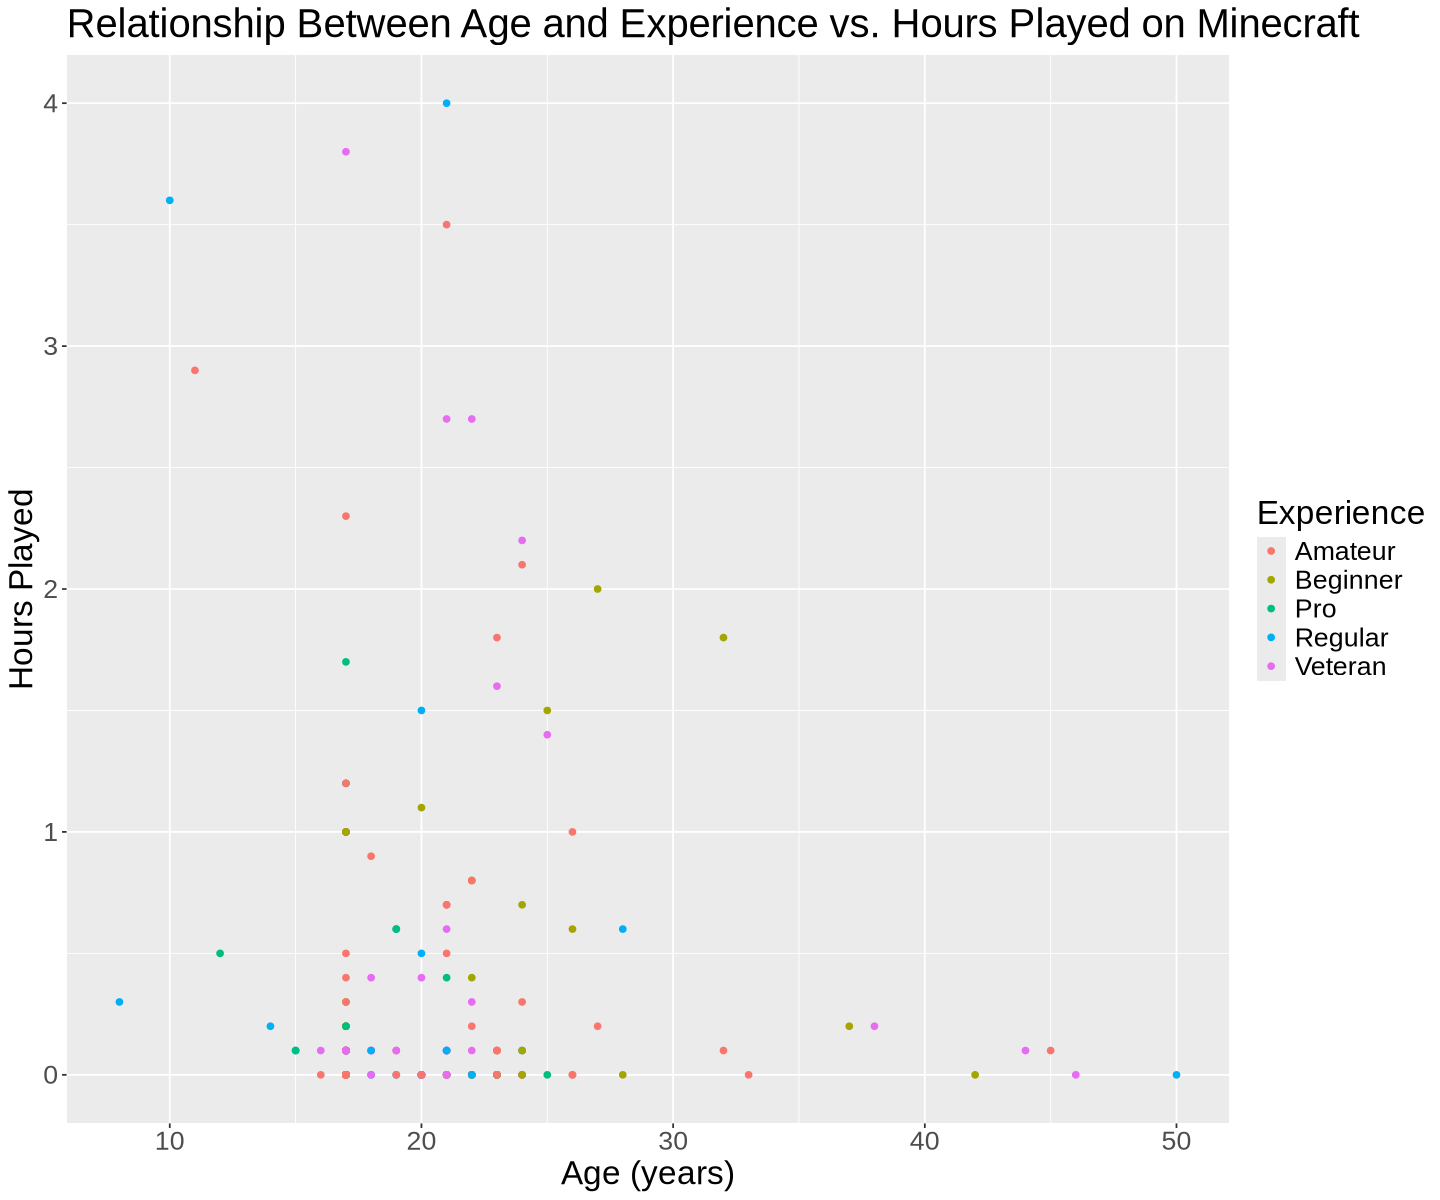

In [4]:
options(repr.plot.width=12, repr.plot.height=10)
mc_plot <- players |> filter(played_hours<5) |> ggplot(aes(x=age, y=played_hours, color=experience)) + geom_point() + labs(x="Age (years)",y="Hours Played", color="Experience", title="Relationship Between Age and Experience vs. Hours Played on Minecraft") + theme(text=element_text(size=20))
mc_plot

From the graph, high contributors, players who played more than 2 hours, tend to be younger and come from a range of experience levels. On the other hand, low contributors, players with less than 2 hours, come from a variety of experience levels, but tend to be older in age (30+). This could be because older players' playtime may be limited by factors such as work and family.

**Preliminary Exploratory Data Analysis, Model Preparation, and Evaluation**

Now that we’ve explored the relationships in the data, the next step is to find the optimal number of clusters, K.

This can be done by splitting the dataset into two parts, the training data and the testing data. After splitting, we must center and scale the predictors to ensure all factors contribute equally and no bias can influence the results. 

Once the pre-processing is complete, we can tune the model and use cross-validation to find the most accurate K value.

In [5]:
set.seed(1)
mc_split <- initial_split(mc_data, prop = 0.75, strata = high_contributor)
mc_train <- training(mc_split)
mc_test <- testing(mc_split)

In [6]:
mc_recipe <- recipe(high_contributor ~ age + experience_num, data = mc_train) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors()) 

kkn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")

In [7]:
mc_vfold <- vfold_cv(mc_train, v = 10, strata = high_contributor)

In [8]:
gridvals <- tibble(neighbors = seq(1, 20, by = 2))

In [9]:
knn_fit <- workflow() |>
  add_recipe(mc_recipe) |>
  add_model(kkn_tune) |>
  tune_grid(resamples = mc_vfold, grid = gridvals) |>
  collect_metrics()

In [10]:
accuracies <- knn_fit |>
    filter(.metric=="accuracy")

best_k <- accuracies |> 
    arrange(desc(mean))
head(best_k)

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
5,accuracy,binary,0.8694505,10,0.00612529,Preprocessor1_Model03
7,accuracy,binary,0.8694505,10,0.00612529,Preprocessor1_Model04
9,accuracy,binary,0.8694505,10,0.00612529,Preprocessor1_Model05
11,accuracy,binary,0.8694505,10,0.00612529,Preprocessor1_Model06
13,accuracy,binary,0.8694505,10,0.00612529,Preprocessor1_Model07
15,accuracy,binary,0.8694505,10,0.00612529,Preprocessor1_Model08


A line graph is plotted to visually assess the optimal K value by showing how the model’s performance changes across different values of K.

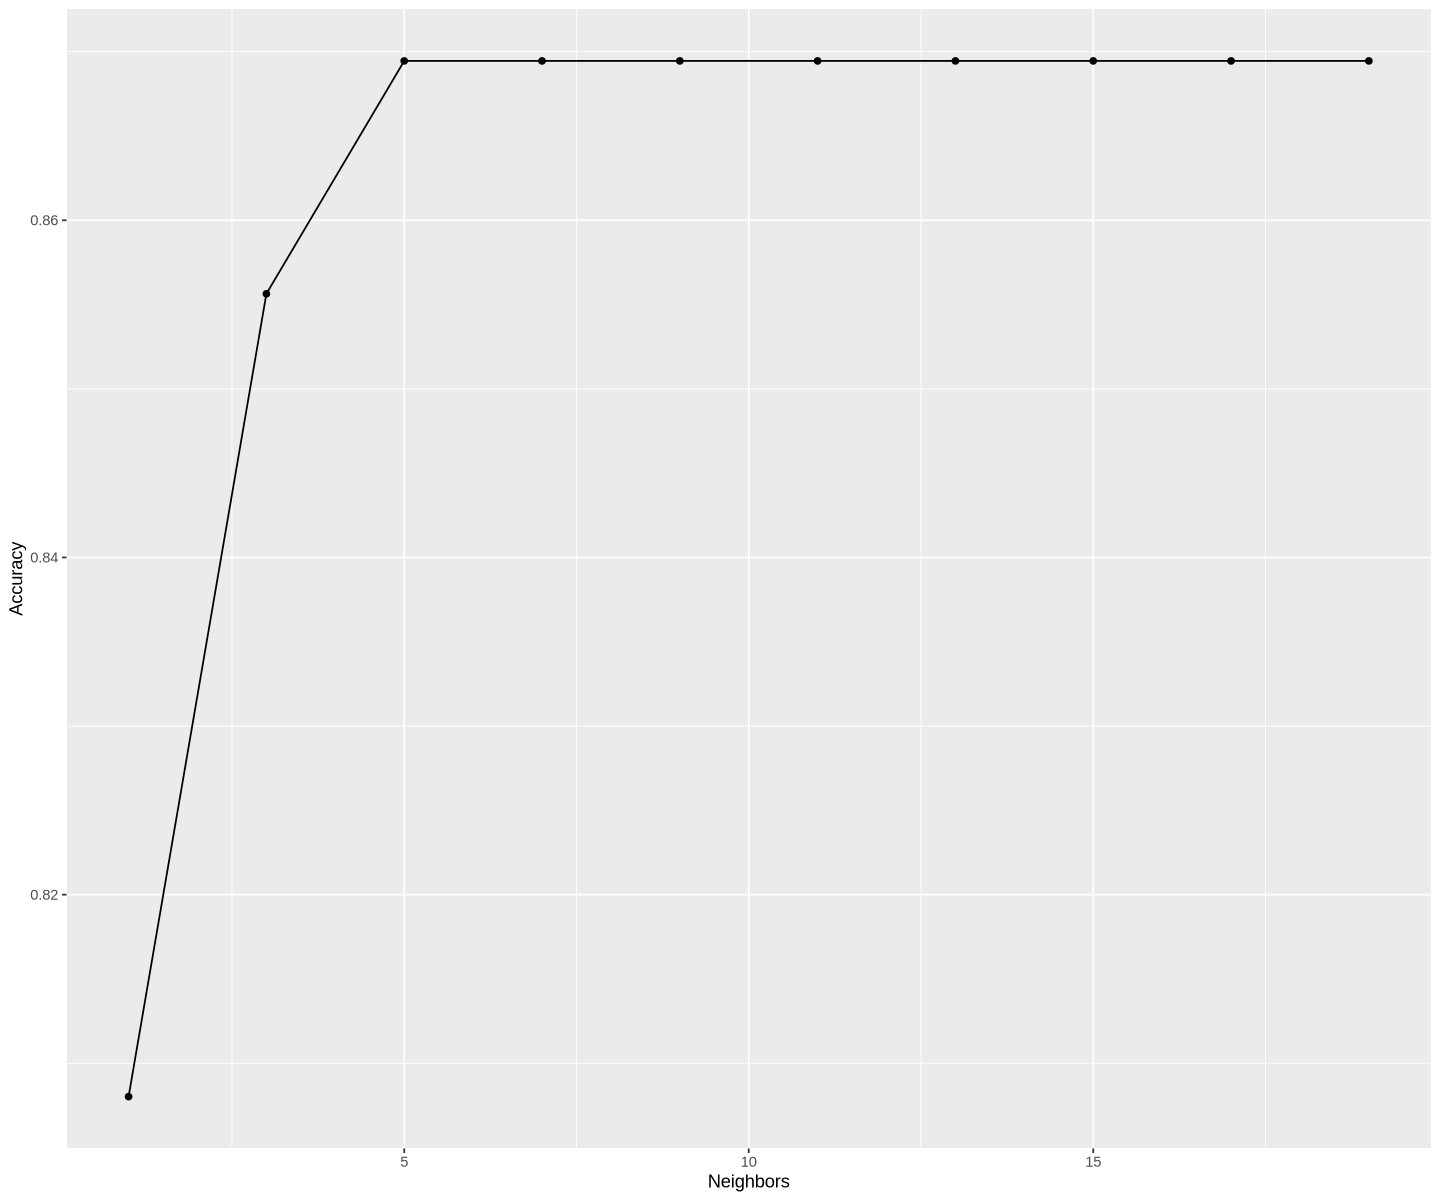

In [11]:
options(repr.plot.width=12, repr.plot.height=10)
accuracy_vs_k <- accuracies |> ggplot(aes(x=neighbors,y=mean))+geom_point()+geom_line()+labs(x="Neighbors",y="Accuracy")
accuracy_vs_k

Multiple K values achieve an accuracy of 86.9%. To keep the model simple and efficient, we chose K = 5.

**Final Model and Evaluation**

Now we can finalize the model and evaluate it on the test set. We apply the same standardization recipe from before and build a new model using the chosen K value of 5. After that, we use the predict function to generate predictions on the testing data.

In [12]:
player_recipe <- recipe(high_contributor ~ age + experience_num, data=mc_train) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

player_spec <- nearest_neighbor(weight_func="rectangular", neighbor=5) |>
    set_engine("kknn") |>
    set_mode("classification")

player_fit <- workflow() |>
    add_recipe(player_recipe) |>
    add_model(player_spec) |>
    fit(data=mc_train)
player_fit

mc_prediction <- predict(player_fit, mc_test) |>
    bind_cols(mc_test)

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(5,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.1310345
Best kernel: rectangular
Best k: 5

Now that the prediction has been made, we can assess the accuracy of the final model.

In [13]:
contributor_test_prediction <- mc_prediction |>
    metrics(truth=high_contributor, estimate=.pred_class) |>
    filter(.metric=="accuracy")
contributor_test_prediction 

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.8571429


In [14]:
conf_mat <- mc_prediction |>
    conf_mat(truth=high_contributor, estimate=.pred_class)
conf_mat

          Truth
Prediction yes no
       yes   0  0
       no    7 42

The assessment shows that the model achieves an overall accuracy of 85.7%, which seems promising. However, after some calculations, the precision is equal to zero, while recall is undefined. This indicates that the model is failing to correctly identify any positive cases.

**Discussion**

This analysis examined whether a player’s experience level and age could be used to predict high contribution, defined as playing more than two hours. The majority of players recorded low playtime, with only a few individuals qualifying as high contributors. These high contributors were primarily between the ages of 16 and 25 and come from a range of experience levels. This suggests that experience level alone is not a reliable indicator of high contribution.

The confusion matrix revealed that the model accurately identified 42 true negatives, but failed to detect any of the 7 actual high contributors, resulting in a model accuracy of 86.9%. However, this metric is misleading, as the model failed to identify any positive predictions, highlighting a significant limitation in its predictive ability.

These findings were unexpected. It was initially assumed that players with more experience, such as veterans and pros, would have more playtime. However, the data showed that some highly experienced players recorded very low hours, while some less experienced players contributed significantly more. The model’s inability to predict any high contributors may be due to class imbalance, where the majority of players were low contributors, potentially skewing the model’s predictions toward the dominant class. Additionally, age emerged as a more influential factor than experience. Younger players were more likely to be high contributors, possibly due to having more free time or stronger engagement with the game.

Overall, the results indicate that playtime is more closely associated with age than with experience, which could have practical implications for targeted marketing strategies or player engagement efforts. The model’s failure to find high contributors shows that we need better prediction methods that can handle uneven data.